## Assignment 3

Rahul Singal
2022113009

In [1]:
ls = [num for num in range(1,101)]
i_bankroll = 1000
bet  = 10
ruin = 0
earnings = 0

In [2]:
import random

## Simplifications and Assumptions

The wheel is assumed to have a 100 numbers from 1 to 100. The colors are divided such that the numbers 1,2,...x are colored red, the numbers x+1,....2* x are colored black and the rest are colored green.

## Strategy 1

In [3]:
def strategy1(i_bankroll, ls, bet,x,color):  
    earnings = 0
    ruin = 0

    for _ in range(1000):
        bankroll = i_bankroll

        for _ in range(1000):
#             x = random.choice(ls)
            roll = random.choice(ls)

            if roll <= x and color == "Red":
                bankroll += bet
            elif roll > x and roll <= 2*x and color == "Black":
                bankroll += bet               
            else:
                bankroll -= bet

            if bankroll <= 0:
                ruin += 1
                break
        
        earnings += bankroll - i_bankroll

    expected_return = earnings / 1000
    risk_ruin = (ruin / 1000) * 100

    return expected_return, risk_ruin

## Strategy 2

In [4]:
def strategy2(i_bankroll, ls, bet,x,color):  
    earnings = 0
    ruin = 0

    for _ in range(1000):
        bankroll = i_bankroll
        current_bet = bet

        for _ in range(1000):
#             x = random.choice(ls)
            roll = random.choice(ls)

            if roll <= x and color == "Red":
                bankroll += current_bet
                current_bet = bet
            elif roll > x and roll <= 2*x and color == "Black":
                bankroll += current_bet
                current_bet = bet
            else:
                bankroll -= current_bet
                current_bet = current_bet*2

            if bankroll <= 0:
                ruin += 1
                break
        
        earnings += bankroll - i_bankroll

    expected_return = earnings / 1000
    risk_ruin = (ruin / 1000) * 100

    return expected_return, risk_ruin

## Strategy 3

In [5]:
def strategy3(i_bankroll, ls, bet,x):
    earnings = 0
    ruin = 0

    for _ in range(1000):
        bankroll = i_bankroll

        for _ in range(1000):
#             x = random.choice(ls)
            roll = random.choice(ls)

            if roll > 2 * x:
                bankroll += bet * 17
            else:
                bankroll -= bet

            if bankroll <= 0:
                ruin += 1
                break

        earnings += bankroll - i_bankroll

    expected_return = earnings / 1000
    risk_ruin = (ruin / 1000) * 100

    return expected_return, risk_ruin

## Strategy 4

In [6]:
def strategy4(i_bankroll, ls, bet,x):
    earnings = 0
    ruin = 0
    colors = ["Red", "Black", "Green"]

    for _ in range(1000):
        bankroll = i_bankroll

        for _ in range(1000):
#             x = random.choice(ls)
            roll = random.choice(ls)
            c = random.choice(colors)

            if roll < 2 * x:
                if c == "Red" and roll <= x:
                    bankroll += bet
                elif c == "Black" and roll > x and roll <= 2*x:
                    bankroll +=bet
                else:
                    bankroll -= bet
            elif roll >= 2 * x:
                if c == "Green":
                    bankroll += bet * 17
                else:
                    bankroll -= bet

            if bankroll <= 0:
                ruin += 1
                break

        earnings += bankroll - i_bankroll

    expected_return = earnings / 1000
    risk_ruin = (ruin / 1000) * 100

    return expected_return, risk_ruin

## Generating Graph for all values of x

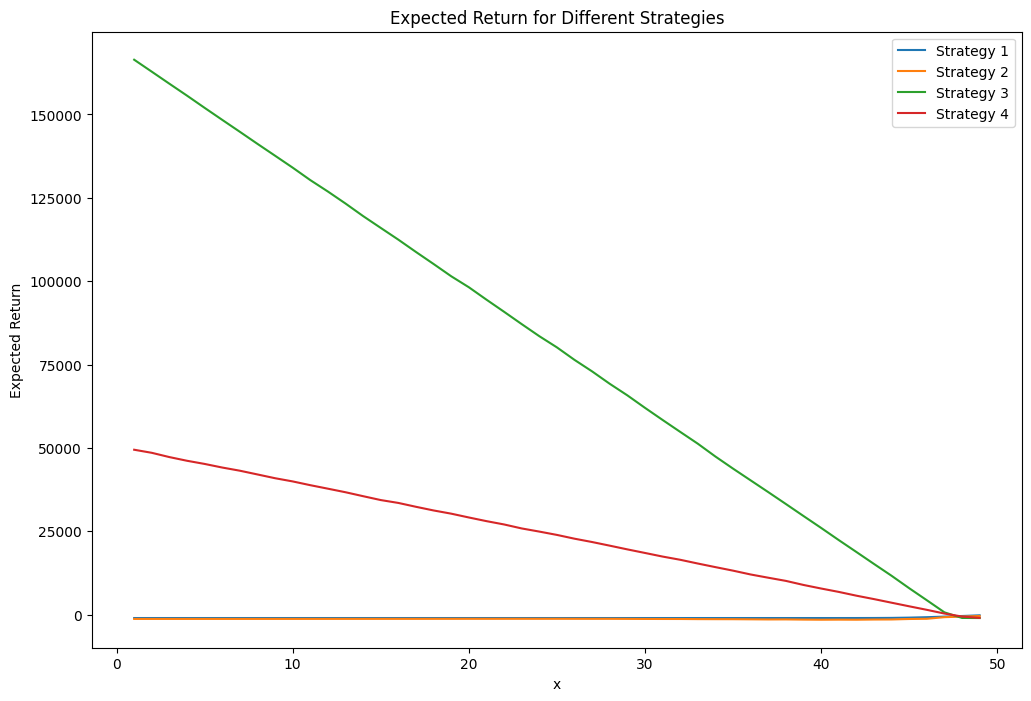

In [7]:
import matplotlib.pyplot as plt

cs = ["Red", "Black"]


ef1_values = []
ef2_values = []
ef3_values = []
ef4_values = []

for x in range(1, 50):
    c = random.choice(cs)
    
    
    e1, _ = strategy1(1000, ls, 10, x, c)
    e2, _ = strategy2(1000, ls, 10, x, c)
    e3, _ = strategy3(1000, ls, 10, x)
    e4, _ = strategy4(1000, ls, 10, x)
    
    
    ef1_values.append((x, e1))
    ef2_values.append((x, e2))
    ef3_values.append((x, e3))
    ef4_values.append((x, e4))


plt.figure(figsize=(12, 8))

plt.plot(*zip(*ef1_values), label='Strategy 1')
plt.plot(*zip(*ef2_values), label='Strategy 2')
plt.plot(*zip(*ef3_values), label='Strategy 3')
plt.plot(*zip(*ef4_values), label='Strategy 4')

plt.xlabel('x')
plt.ylabel('Expected Return')
plt.title('Expected Return for Different Strategies')
plt.legend()
# plt.ylim(0, 200000)
plt.show()


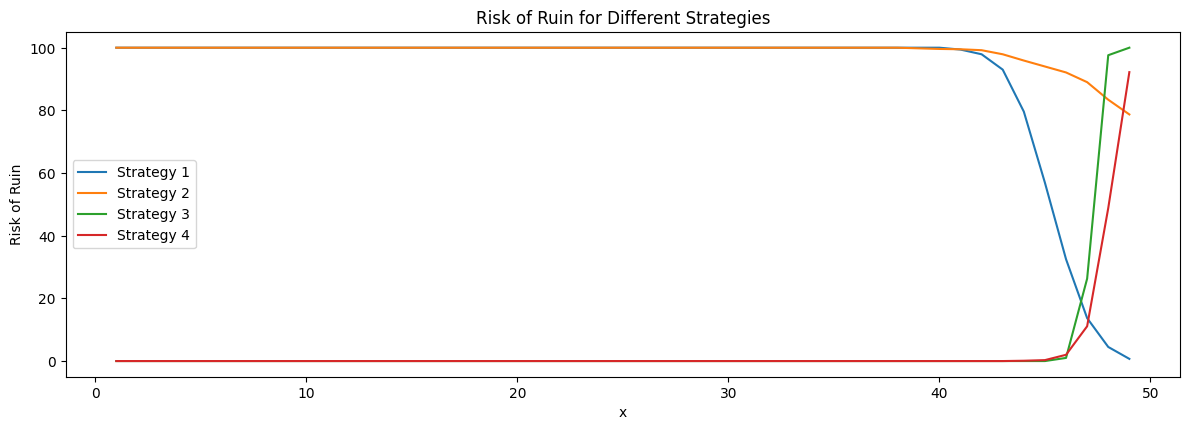

In [8]:
import matplotlib.pyplot as plt


ef1 = 0
rf1 = 0
ef2 = 0
rf2 = 0
ef3 = 0
rf3 = 0
ef4 = 0
rf4 = 0
cs = ["Red","Black"]

ef1_values = []
rf1_values = []
ef2_values = []
rf2_values = []
ef3_values = []
rf3_values = []
ef4_values = []
rf4_values = []


for x in range(1, 50):
    c = random.choice(cs)    
    
    
    e1, r1 = strategy1(1000, ls, 10, x, c)
    e2, r2 = strategy2(1000, ls, 10, x, c)
    e3, r3 = strategy3(1000, ls, 10, x)
    e4, r4 = strategy4(1000, ls, 10, x)
    
    
    ef1_values.append(e1)
    rf1_values.append(r1)
    ef2_values.append(e2)
    rf2_values.append(r2)
    ef3_values.append(e3)
    rf3_values.append(r3)
    ef4_values.append(e4)
    rf4_values.append(r4)


plt.figure(figsize=(12, 8))




plt.subplot(2, 1, 2)
plt.plot(range(1, 50), rf1_values, label='Strategy 1')
plt.plot(range(1, 50), rf2_values, label='Strategy 2')
plt.plot(range(1, 50), rf3_values, label='Strategy 3')
plt.plot(range(1, 50), rf4_values, label='Strategy 4')
plt.xlabel('x')
plt.ylabel('Risk of Ruin')
plt.title('Risk of Ruin for Different Strategies')
plt.legend()

plt.tight_layout()
plt.show()


From above we can infer that the highest risk will be for strategy 2, since the risk of ruin is pretty high for all possible values of x. The return value is also not that high as compared to strategy 3 and 4.
Strategy 1  also has a very high risk of ruin for large number of possible values of x, so it should not be preferred.
Both strategy 1 and 2 give very less returns as compared to strategy 3 and 4.

Strategy 3 has the highest return of all the strategies as can be seen be seen from the graph and the mean value. However, we must also note that when the value of x nears 45 then there is a sudden shoot up in the risk of ruin and hence can be disastrous for large values of x.

Strategy 4 also has a high return but not as high as strategy 3, however there is also risk of ruin for highest values of x.
The return values for both strategy 3 and 4 are very high as compared to strategy 1 and 2 which give very minimal results as compared to the initial bankroll.
On close observation of the graph we can see that both strategy 3 and 4 have 0 ruin value for most values of x however the ruin shoots up first for strategy 4 as compared to strategy 3.


To minimise our losses over the long term and maximise returns, it is prefered to use strategy 3 as the risk of ruin tends to 0 and at the end we are always at profit and the loss is minimal and negligible.

